In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score



In [ ]:
#Loading mnist datset from keras
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [ ]:
# data=pd.DataFrame(y_train)
# data.to_excel("target.xlsx")


5


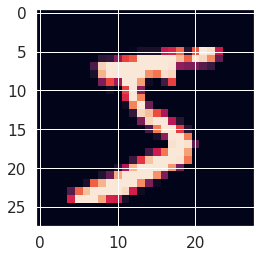

In [ ]:
print(y_train[0])
plt.imshow(x_train[0])

Pre-processing

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
IMG_SIZE=28
x_train=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_test=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
print("Training data dimension: ", x_train.shape)
print("Testing data dimension: ", x_test.shape)

Training data dimension:  (60000, 28, 28, 1)
Testing data dimension:  (10000, 28, 28, 1)


In [ ]:
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


Building CNN model

In [ ]:
#creating a neural network
model=Sequential()

#First Convolution Layer
model.add(Conv2D(64, (5,5), input_shape=x_train.shape[1:])) #only for first convolution layer to mention input size
model.add(Activation("relu")) #activation function to make it non-linera, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling single maximum value of 2x2


#2nd Convolution Layer
model.add(Conv2D(64, (5,5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected Layer 1
model.add(Flatten())#before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))


#fully connected Layer 2
model.add(Dense(10))
model.add(Activation("softmax"))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 activation_8 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          102464    
                                                                 
 activation_9 (Activation)   (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                  

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
score=model.fit(x_train,y_train,epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1787 - accuracy: 0.9441 - val_loss: 0.0656 - val_accuracy: 0.9809
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0548 - accuracy: 0.9831 - val_loss: 0.0576 - val_accuracy: 0.9819
Epoch 3/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0443 - val_accuracy: 0.9863
Epoch 4/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0483 - val_accuracy: 0.9850
Epoch 5/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0494 - val_accuracy: 0.9859
Epoch 6/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.0542 - val_accuracy: 0.9855
Epoch 7/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0451 - val_accuracy:

In [ ]:
prediction=model.predict([x_train])

1875/1875 [==============================] - 3s 2ms/step


In [ ]:
train_pred=[]
for i in range(0,len(prediction)):
  t=np.argmax(prediction[i])
  train_pred.append(t)


Accuray:  99.56
Precision:  99.56
Recall:  99.56
F1 Score:  99.56


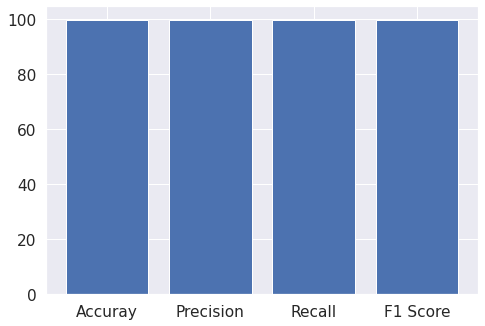

In [ ]:
acc=round(accuracy_score(y_train,train_pred),4)*100
pre=round(precision_score(y_train,train_pred, average='macro'),4)*100
rec=round(precision_score(y_train,train_pred,average='macro'),4)*100
f1=round(f1_score(y_train,train_pred,average='macro'),4)*100

print("Accuray: ",acc)
print("Precision: ",pre)
print("Recall: ",rec)
print("F1 Score: ",f1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [acc, pre, rec, f1]
ax.bar(Performance,data)
plt.show()


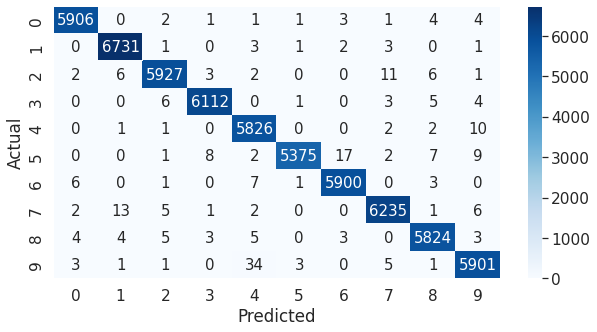

In [ ]:
con_max=confusion_matrix(y_train,train_pred)
label=["0","1","2","3","4","5","6","7","8","9"]
df_cm=pd.DataFrame(con_max,columns=np.unique(y_train),index=np.unique(y_train))
df_cm.index.name="Actual"
df_cm.columns.name="Predicted"
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":15},fmt="d")

**Testing Model**

In [ ]:
test_prediction=model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [ ]:
test_pred=[]
for i in range(0,len(test_prediction)):
  t=np.argmax(test_prediction[i])
  test_pred.append(t)

Accuray:  99.15
Precision:  99.15
Recall:  99.15
F1 Score:  99.14


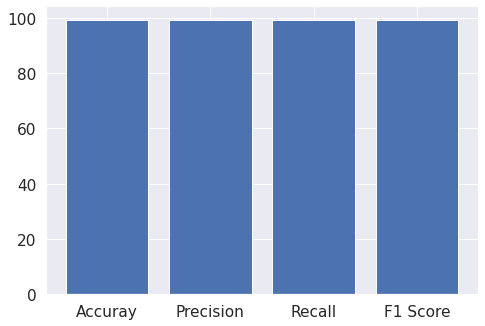

In [ ]:
acc=round(accuracy_score(y_test,test_pred),4)*100
pre=round(precision_score(y_test,test_pred, average='macro'),4)*100
rec=round(precision_score(y_test,test_pred,average='macro'),4)*100
f1=round(f1_score(y_test,test_pred,average='macro'),4)*100

print("Accuray: ",acc)
print("Precision: ",pre)
print("Recall: ",rec)
print("F1 Score: ",f1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [acc, pre, rec, f1]
ax.bar(Performance,data)
plt.show()


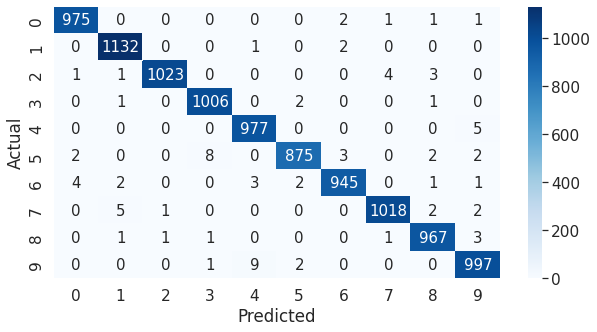

In [ ]:
con_mx=confusion_matrix(y_test,test_pred)

label=["0","1","2","3","4","5","6","7","8","9"]
df_cm=pd.DataFrame(con_mx,columns=np.unique(y_test),index=np.unique(y_test))
df_cm.index.name="Actual"
df_cm.columns.name="Predicted"
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":15},fmt="d")

**Recognition System**

In [ ]:
img1=cv2.imread("img_1.png")
img2=cv2.imread("img_2.png")
img3=cv2.imread("img_7.png")
img4=cv2.imread("img_8.png")
img=[img1,img2,img3,img4]

In [ ]:
for i in range(len(img)):
  gray=cv2.cvtColor(img[i],cv2.COLOR_BGR2GRAY)
  resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
  input=tf.keras.utils.normalize(resized, axis=1)#normalize
  input=np.array(input).reshape(-1,IMG_SIZE,IMG_SIZE,1)#increase one dimension for kernel
  prediction=model.predict(input)
  print("Img "+str(i+1)+":",np.argmax(prediction))


1/1 [==============================] - 0s 52ms/step
Img 1: 1
1/1 [==============================] - 0s 14ms/step
Img 2: 2
1/1 [==============================] - 0s 25ms/step
Img 3: 7
1/1 [==============================] - 0s 21ms/step
Img 4: 8


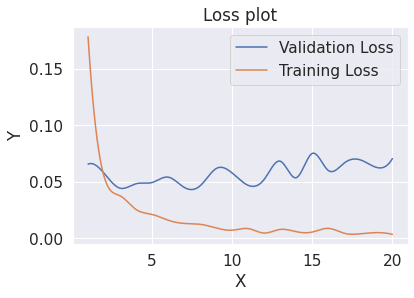

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
history_dict = score.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['loss']
y1=history_dict['val_loss']

model = make_interp_spline(epochs, y)
model1 = make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)

plt.xlabel('Epochs')
plt.plot(xs, ys1, label='Validation Loss')
plt.plot(xs, ys,label='Training Loss')
plt.title("Loss plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

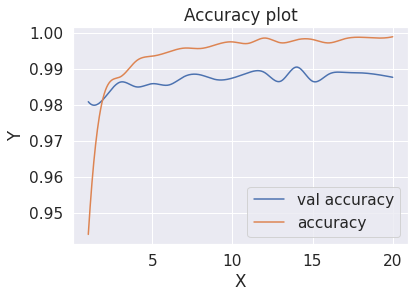

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
history_dict = score.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['accuracy']
y1=history_dict['val_accuracy']

model=make_interp_spline(epochs, y)
model1=make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)
plt.xlabel('Epochs')
plt.plot(xs, ys1, label='val accuracy')
plt.plot(xs, ys,label='accuracy')
plt.title("Accuracy plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()